<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی<br>Convolutionl Neural Networks - CNN</div></center></h1>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
اگر روی گوگل کولب اجرا میکنید این خطوط را از حالت کامنت خارج نمائید.
</div>

In [ ]:
#!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
#!mkdir dataset
#!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کد یک شبکه کانولوشنالی و آموزش آن از ابتدا تا انتها بر روی مجموعه داده هدی</div>


In [2]:
# 1. Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=28)

# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(X_train, y_train,
          epochs=200, batch_size=256, validation_split=0.2)


Epoch 1/200
11/11 [==============================] - 22s 186ms/step - loss: 2.2148 - accuracy: 0.2327 - val_loss: 1.5786 - val_accuracy: 0.6943
Epoch 2/200
11/11 [==============================] - 1s 116ms/step - loss: 1.4473 - accuracy: 0.5336 - val_loss: 0.7262 - val_accuracy: 0.7857
Epoch 3/200
11/11 [==============================] - 1s 132ms/step - loss: 0.8870 - accuracy: 0.7002 - val_loss: 0.4640 - val_accuracy: 0.8571
Epoch 4/200
11/11 [==============================] - 1s 121ms/step - loss: 0.6153 - accuracy: 0.7918 - val_loss: 0.3371 - val_accuracy: 0.8829
Epoch 5/200
11/11 [==============================] - 1s 122ms/step - loss: 0.4766 - accuracy: 0.8443 - val_loss: 0.2959 - val_accuracy: 0.8943
Epoch 6/200
11/11 [==============================] - 1s 119ms/step - loss: 0.4094 - accuracy: 0.8622 - val_loss: 0.2437 - val_accuracy: 0.9129
Epoch 7/200
11/11 [==============================] - 1s 127ms/step - loss: 0.3429 - accuracy: 0.8748 - val_loss: 0.2273 - val_accuracy: 0.910

Epoch 58/200
11/11 [==============================] - 1s 115ms/step - loss: 0.0318 - accuracy: 0.9917 - val_loss: 0.1105 - val_accuracy: 0.9686
Epoch 59/200
11/11 [==============================] - 1s 111ms/step - loss: 0.0239 - accuracy: 0.9916 - val_loss: 0.1138 - val_accuracy: 0.9643
Epoch 60/200
11/11 [==============================] - 1s 113ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.1175 - val_accuracy: 0.9686
Epoch 61/200
11/11 [==============================] - 1s 114ms/step - loss: 0.0275 - accuracy: 0.9892 - val_loss: 0.1019 - val_accuracy: 0.9714
Epoch 62/200
11/11 [==============================] - 1s 113ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.1001 - val_accuracy: 0.9700
Epoch 63/200
11/11 [==============================] - 1s 112ms/step - loss: 0.0320 - accuracy: 0.9891 - val_loss: 0.1175 - val_accuracy: 0.9729
Epoch 64/200
11/11 [==============================] - 1s 109ms/step - loss: 0.0238 - accuracy: 0.9942 - val_loss: 0.1202 - val_accuracy:

Epoch 115/200
11/11 [==============================] - 1s 106ms/step - loss: 0.0115 - accuracy: 0.9947 - val_loss: 0.1185 - val_accuracy: 0.9700
Epoch 116/200
11/11 [==============================] - 1s 106ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.1286 - val_accuracy: 0.9700
Epoch 117/200
11/11 [==============================] - 1s 127ms/step - loss: 0.0119 - accuracy: 0.9953 - val_loss: 0.1414 - val_accuracy: 0.9686
Epoch 118/200
11/11 [==============================] - 1s 113ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.1622 - val_accuracy: 0.9686
Epoch 119/200
11/11 [==============================] - 1s 114ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.1688 - val_accuracy: 0.9700
Epoch 120/200
11/11 [==============================] - 1s 116ms/step - loss: 0.0125 - accuracy: 0.9951 - val_loss: 0.1816 - val_accuracy: 0.9614
Epoch 121/200
11/11 [==============================] - 1s 116ms/step - loss: 0.0195 - accuracy: 0.9912 - val_loss: 0.1508 - val_ac

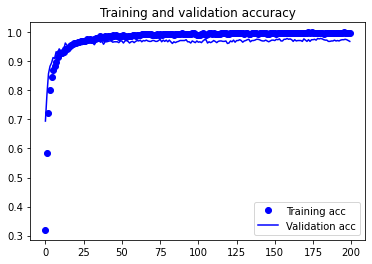

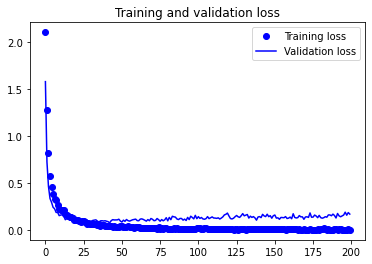

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()